# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

Created by Sujith Mangalathu and Jong-Su Jeon

# Data Exploration

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


data1 = pd.read_excel('Shear_Wall_Database.xlsx', sheet_name='Database')
data1.head()

,Unnamed: 0,Author,Specimen,Failure,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Section,Ab/Acv
0,1,Lefas et al. (1990a),SW11,1,1.1,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,2,Lefas et al. (1990a),SW12,1,1.1,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,3,Lefas et al. (1990a),SW13,1,1.1,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,4,Lefas et al. (1990a),SW14,1,1.1,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,5,Lefas et al. (1990a),SW15,1,1.1,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [4]:
data=data1.loc[:, 'Failure':'Ab/Acv']
data.head()

,Failure,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Section,Ab/Acv
0,1,1.1,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,1,1.1,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,1,1.1,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,1,1.1,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,1,1.1,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [5]:
print(data.shape)

(385, 11)


# Checking the data types, If string exists it should be converted into numerical values

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 11 columns):
Failure        385 non-null int64
hw/lw          385 non-null float64
lw/tw          385 non-null float64
fc             385 non-null float64
ρvwFy,vw/fc    385 non-null float64
ρhwFy,vw/fc    385 non-null float64
ρvcFy,vc/fc    385 non-null float64
ρhcFy,hc/fc    385 non-null float64
ALF            385 non-null float64
Section        385 non-null object
Ab/Acv         385 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 33.2+ KB
None


Section contains string values

In [7]:
print(data['Section'].unique())


['R' 'B' 'I']


In [8]:
print(data.groupby('Section').size())

Section
B     95
I     60
R    230
dtype: int64


Rectnagular section is more than Barbel and flanged section

In [9]:
data_mod_lc = data.copy()
data_mod_lc['Section'] = data_mod_lc['Section'].astype('category')
#print(cat_bird_lc.dtypes)
data_mod_lc['Section'] = data_mod_lc['Section'].cat.codes
data_mod_lc.head(10)

,Failure,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Section,Ab/Acv
0,1,1.100000,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.100000,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.100000,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.100000,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.100000,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0
5,1,1.100000,10.714286,41.36,0.271999,0.138298,0.352273,0.150870,0.211845,2,0.0
6,1,1.100000,10.714286,38.64,0.291146,0.049793,0.401398,0.161491,0.000000,2,0.0
7,1,2.115385,10.000000,34.24,0.342420,0.121495,0.452979,0.136682,0.000000,2,0.0
8,1,2.115385,10.000000,40.48,0.290267,0.102767,0.383152,0.115613,0.106415,2,0.0
9,1,2.115385,10.000000,38.24,0.307270,0.108787,0.405596,0.122385,0.212300,2,0.0


In [10]:
data['Section'] = data_mod_lc['Section']
data.head()

,Failure,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Section,Ab/Acv
0,1,1.1,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.1,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.1,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.1,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.1,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0


In [11]:
c = data_mod_lc.Section.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

{0: 0, 1: 1, 2: 2}


In [12]:
#checking missing values by column
data.isnull().sum()

Failure        0
hw/lw          0
lw/tw          0
fc             0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
ALF            0
Section        0
Ab/Acv         0
dtype: int64

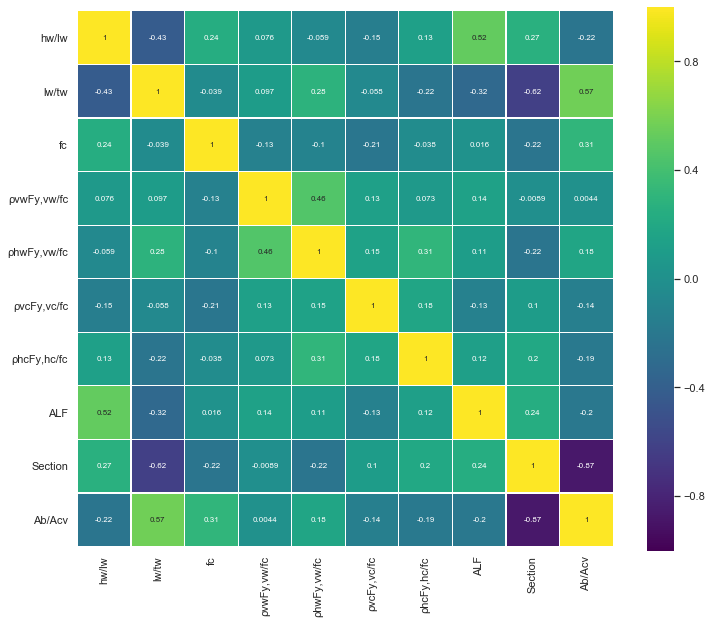

In [13]:
corr = data.drop('Failure', axis=1).corr() # examining correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

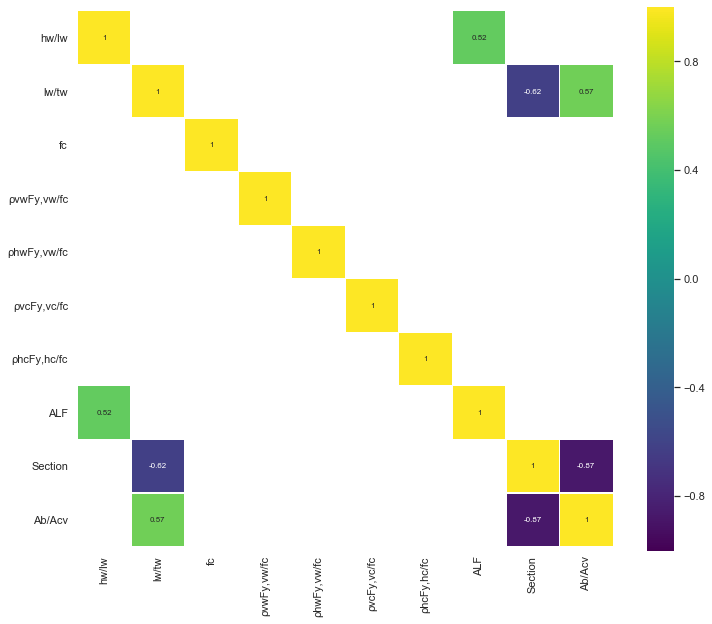

In [14]:
# Plotting correlation above or below 0.5
corr = data.drop('Failure', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [15]:
features = list(data.columns.values)
print(features)

['Failure', 'hw/lw', 'lw/tw', 'fc', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'ALF', 'Section', 'Ab/Acv']


C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sujit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


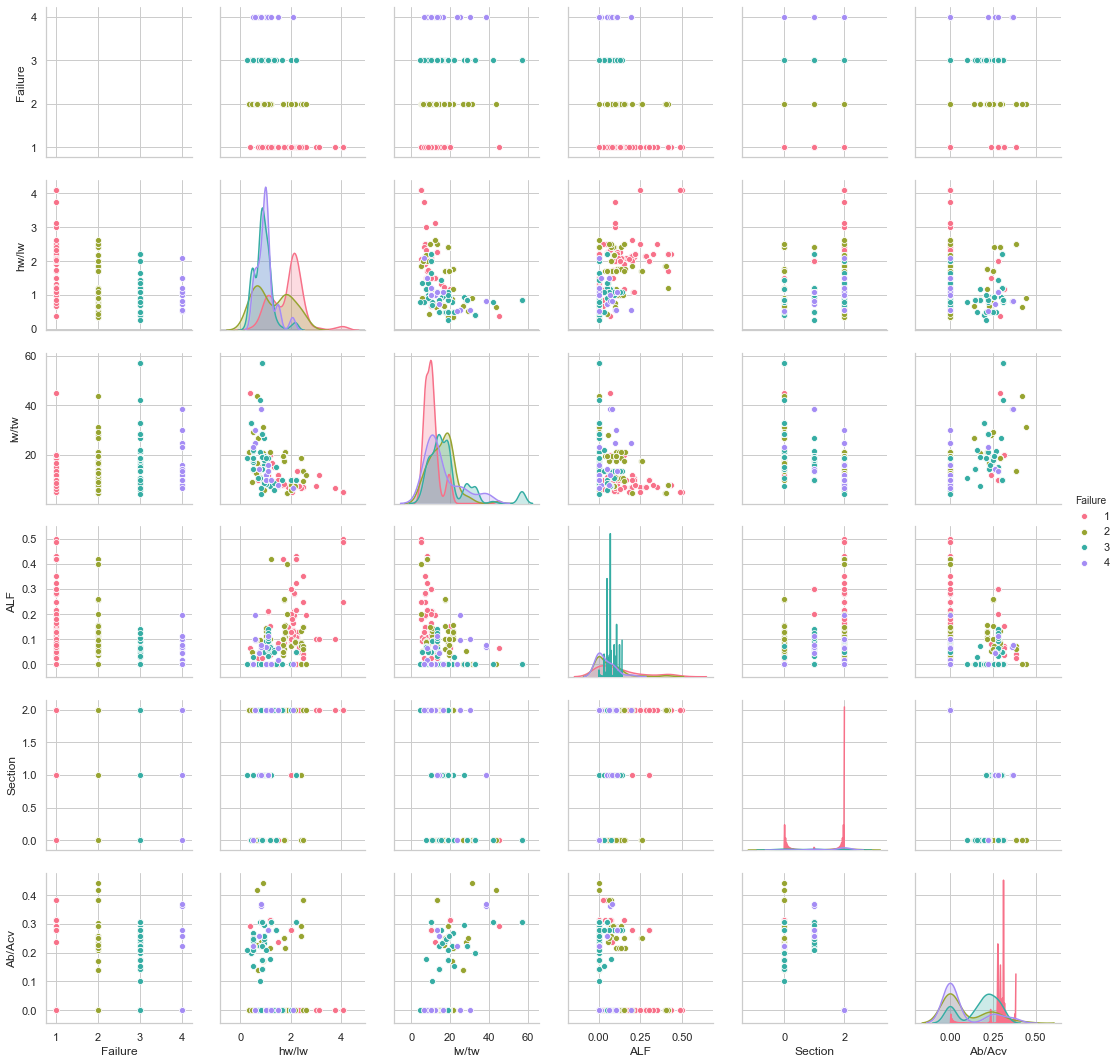

In [16]:
import seaborn as sns

quantitative_features_list1 = ['Failure', 'hw/lw', 'lw/tw', 'ALF', 'Section', 'Ab/Acv']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="Failure", palette="husl")

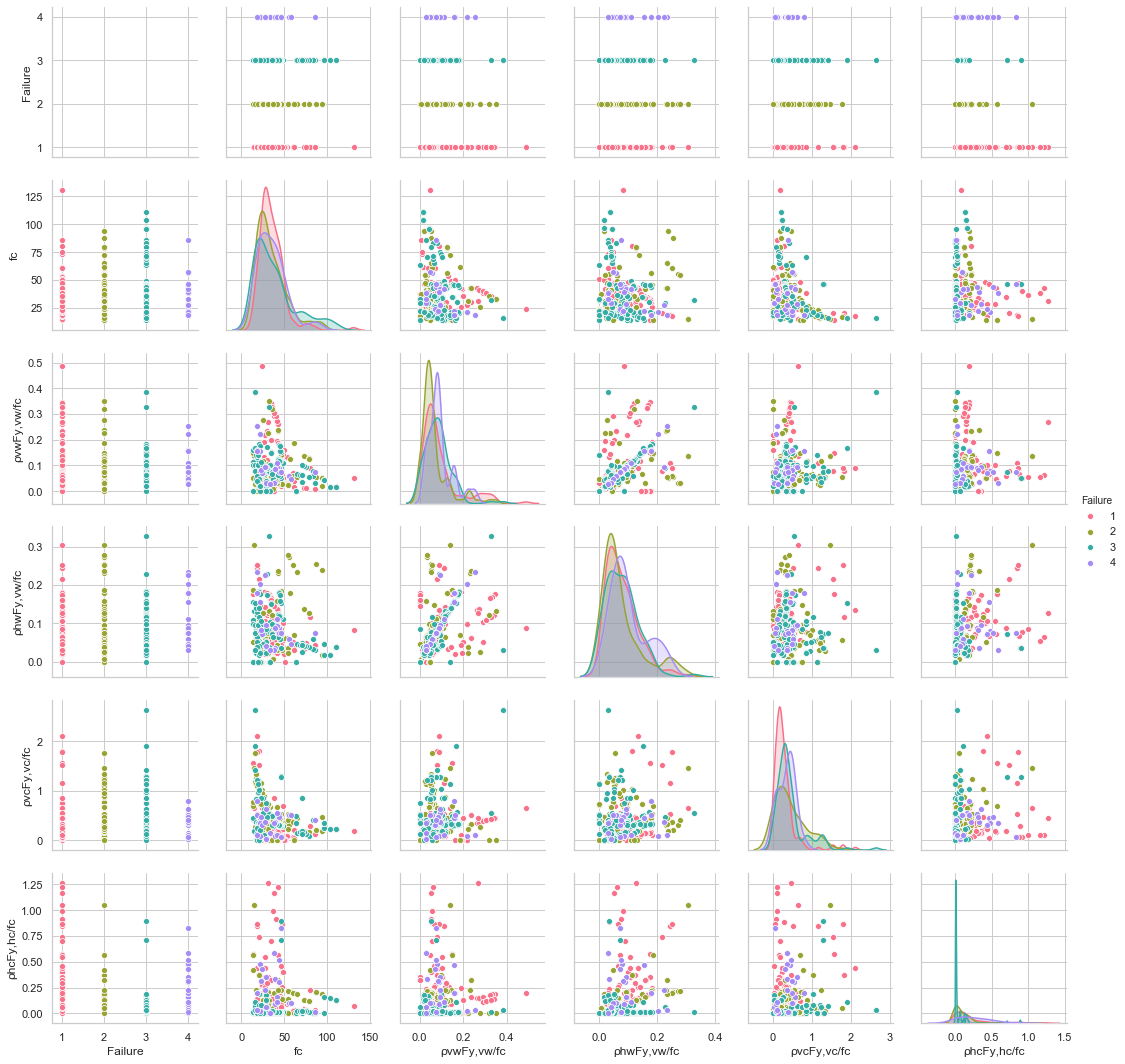

In [17]:
import seaborn as sns

quantitative_features_list1 = ['Failure', 'fc', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data, hue="Failure", palette="husl")

Text(0, 0.5, 'Failure')

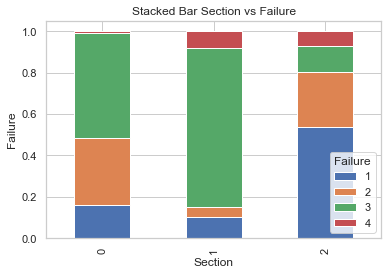

In [19]:
table=pd.crosstab(data.Section,data.Failure)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Section vs Failure')
plt.xlabel('Section')
plt.ylabel('Failure')

Section type seems to have an influence on the failure mode. However further analysis is needed to check whether its statistically significant

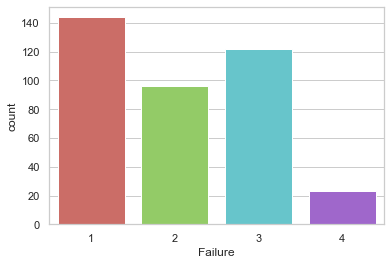

In [20]:
#Lets check wheter data is imbalanced

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Failure',data=data, palette='hls')
plt.show()

Data set is imbalanced with respect to the Failure Mode

In [21]:
#One Hot Encoding for the categorical values
data = pd.get_dummies(data = data , columns=['Section'] )
data.head()

,Failure,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Ab/Acv,Section_0,Section_1,Section_2
0,1,1.1,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,0,0,1
1,1,1.1,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,0,0,1
2,1,1.1,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,0,0,1
3,1,1.1,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,0,0,1
4,1,1.1,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,0,0,1


In [22]:
X = data.loc[:, data.columns != 'Failure']
y=data['Failure']
X.head()

,hw/lw,lw/tw,fc,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",ALF,Ab/Acv,Section_0,Section_1,Section_2
0,1.1,10.714286,41.84,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,0,0,1
1,1.1,10.714286,42.88,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,0,0,1
2,1.1,10.714286,32.48,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,0,0,1
3,1.1,10.714286,33.68,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,0,0,1
4,1.1,10.714286,34.64,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,0,0,1


##### Spliiting the data into training and test sets

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Failure, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes techique

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.33
Accuracy of GNB classifier on test set: 0.43


Confusion Matrix of training set

In [26]:
y_pred_train = gnb.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[33  5  5 56]
 [ 4  8 12 45]
 [ 1  1 30 52]
 [ 0  0  0 17]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.87      0.33      0.48        99
           2       0.57      0.12      0.19        69
           3       0.64      0.36      0.46        84
           4       0.10      1.00      0.18        17

    accuracy                           0.33       269
   macro avg       0.54      0.45      0.33       269
weighted avg       0.67      0.33      0.38       269



Confusion Matrix of test set

In [28]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[15  2  3 25]
 [ 2 11  2 12]
 [ 0  1 19 18]
 [ 0  0  1  5]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.33      0.48        45
           2       0.79      0.41      0.54        27
           3       0.76      0.50      0.60        38
           4       0.08      0.83      0.15         6

    accuracy                           0.43       116
   macro avg       0.63      0.52      0.44       116
weighted avg       0.78      0.43      0.52       116



## K-Nearest neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.78


Confusion Matrix of training set

In [31]:
y_pred_train = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[92  5  2  0]
 [12 52  4  1]
 [ 3  5 76  0]
 [ 2  5  4  6]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        99
           2       0.78      0.75      0.76        69
           3       0.88      0.90      0.89        84
           4       0.86      0.35      0.50        17

    accuracy                           0.84       269
   macro avg       0.84      0.74      0.76       269
weighted avg       0.84      0.84      0.83       269



Confusion Matrix of test set

In [33]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  1  0  3]
 [ 6 18  3  0]
 [ 4  5 29  0]
 [ 1  2  1  2]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.91      0.85        45
           2       0.69      0.67      0.68        27
           3       0.88      0.76      0.82        38
           4       0.40      0.33      0.36         6

    accuracy                           0.78       116
   macro avg       0.69      0.67      0.68       116
weighted avg       0.78      0.78      0.77       116



## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79


Confusion Matrix of training set

In [36]:
y_pred_train = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 0  0  0 17]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        17

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



Confusion Matrix of test set

In [38]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[35  7  0  3]
 [ 5 20  1  1]
 [ 2  3 32  1]
 [ 0  0  1  5]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.78      0.80        45
           2       0.67      0.74      0.70        27
           3       0.94      0.84      0.89        38
           4       0.50      0.83      0.62         6

    accuracy                           0.79       116
   macro avg       0.74      0.80      0.76       116
weighted avg       0.81      0.79      0.80       116



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF = RandomForestClassifier(n_estimators=200,  random_state=0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.85


Confusion Matrix of training set

In [41]:
y_pred_train = RF.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 0  0  0 17]]


Confusion Matrix of test set


In [42]:
y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  4  0  0]
 [ 5 21  1  0]
 [ 1  4 33  0]
 [ 0  1  1  4]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89        45
           2       0.70      0.78      0.74        27
           3       0.94      0.87      0.90        38
           4       1.00      0.67      0.80         6

    accuracy                           0.85       116
   macro avg       0.88      0.81      0.83       116
weighted avg       0.86      0.85      0.85       116



In [44]:
RF.feature_importances_

array([0.1755013 , 0.10513318, 0.08457245, 0.08095286, 0.08329105,
       0.12067559, 0.13043324, 0.07214141, 0.06965805, 0.01193097,
       0.02350715, 0.04220275])

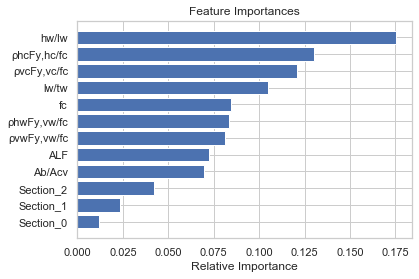

In [45]:
features = list(X.columns.values)

importances = RF.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hypertune Random Forest Parameters to improve the accuracy

In [127]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.7min finished
C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF1 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth=70, bootstrap= 'False')
RF1.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF1.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF1.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.86


Confusion Matrix of training set

In [129]:
y_pred_train = RF1.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 0  1  1 15]]


Confusion Matrix of test set

In [130]:
y_pred = RF1.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42  3  0  0]
 [ 5 21  1  0]
 [ 1  4 33  0]
 [ 0  1  1  4]]


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        45
           2       0.72      0.78      0.75        27
           3       0.94      0.87      0.90        38
           4       1.00      0.67      0.80         6

   micro avg       0.86      0.86      0.86       116
   macro avg       0.89      0.81      0.84       116
weighted avg       0.87      0.86      0.86       116



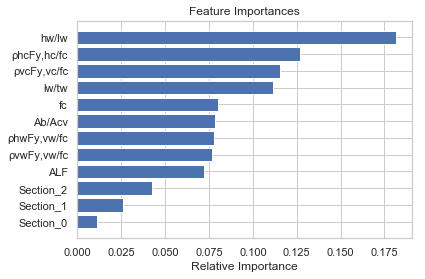

In [132]:
RF1.feature_importances_
features = list(X.columns.values)

importances = RF1.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## ADABOOST

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ADB = AdaBoostClassifier(n_estimators=100, random_state=0)
ADB.fit(X_train, y_train)
print('Accuracy of ADB classifier on training set: {:.2f}'
     .format(ADB.score(X_train, y_train)))
print('Accuracy of ADB classifier on test set: {:.2f}'
     .format(ADB.score(X_test, y_test)))

Accuracy of ADB classifier on training set: 0.71
Accuracy of ADB classifier on test set: 0.58


Confusion Matrix of training set

In [134]:
y_pred_train = ADB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[75 21  1  2]
 [18 40 11  0]
 [ 3 16 64  1]
 [ 3  1  1 12]]


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        99
           2       0.51      0.58      0.54        69
           3       0.83      0.76      0.80        84
           4       0.80      0.71      0.75        17

   micro avg       0.71      0.71      0.71       269
   macro avg       0.73      0.70      0.71       269
weighted avg       0.72      0.71      0.71       269



Confusion Matrix of test set

In [136]:
y_pred = ADB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29 13  0  3]
 [12 11  3  1]
 [ 3 11 24  0]
 [ 1  2  0  3]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        45
           2       0.30      0.41      0.34        27
           3       0.89      0.63      0.74        38
           4       0.43      0.50      0.46         6

   micro avg       0.58      0.58      0.58       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.63      0.58      0.60       116



## XGBOOST

In [138]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(XGB.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(XGB.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.99
Accuracy of XGB classifier on test set: 0.84


Confusion Matrix of training set

In [139]:
y_pred_train = XGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 1  1  0 15]]


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        99
           2       0.99      1.00      0.99        69
           3       1.00      1.00      1.00        84
           4       1.00      0.88      0.94        17

   micro avg       0.99      0.99      0.99       269
   macro avg       0.99      0.97      0.98       269
weighted avg       0.99      0.99      0.99       269



Confusion Matrix of test set

In [141]:
y_pred = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  4  0  0]
 [ 7 19  1  0]
 [ 1  4 33  0]
 [ 0  1  0  5]]


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.91      0.87        45
           2       0.68      0.70      0.69        27
           3       0.97      0.87      0.92        38
           4       1.00      0.83      0.91         6

   micro avg       0.84      0.84      0.84       116
   macro avg       0.87      0.83      0.85       116
weighted avg       0.85      0.84      0.85       116



## Light GBM

In [143]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

LGB = LGBMClassifier()
LGB.fit(X_train, y_train)
print('Accuracy of LGB classifier on training set: {:.2f}'
     .format(LGB.score(X_train, y_train)))
print('Accuracy of LGB classifier on test set: {:.2f}'
     .format(LGB.score(X_test, y_test)))

Accuracy of LGB classifier on training set: 1.00
Accuracy of LGB classifier on test set: 0.78


Confusion Matrix of training set

In [144]:
y_pred_train = LGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 0  0  0 17]]


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



Confusion Matrix of test set


In [146]:
y_pred = LGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[38  7  0  0]
 [ 9 17  1  0]
 [ 2  5 31  0]
 [ 0  1  0  5]]


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.84      0.81        45
           2       0.57      0.63      0.60        27
           3       0.97      0.82      0.89        38
           4       1.00      0.83      0.91         6

   micro avg       0.78      0.78      0.78       116
   macro avg       0.83      0.78      0.80       116
weighted avg       0.80      0.78      0.79       116



# Cat BOOST

In [148]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

CGB = CatBoostClassifier()
CGB.fit(X_train, y_train)
print('Accuracy of CGB classifier on training set: {:.2f}'
     .format(CGB.score(X_train, y_train)))
print('Accuracy of CGB classifier on test set: {:.2f}'
     .format(CGB.score(X_test, y_test)))

0:	learn: -1.3672461	total: 505ms	remaining: 8m 24s
1:	learn: -1.3455983	total: 1.49s	remaining: 12m 24s
2:	learn: -1.3225902	total: 1.91s	remaining: 10m 35s
3:	learn: -1.3027587	total: 2.5s	remaining: 10m 23s
4:	learn: -1.2845254	total: 3.07s	remaining: 10m 10s
5:	learn: -1.2635330	total: 3.48s	remaining: 9m 36s
6:	learn: -1.2451426	total: 4.19s	remaining: 9m 54s
7:	learn: -1.2250774	total: 4.79s	remaining: 9m 54s
8:	learn: -1.2083306	total: 5.28s	remaining: 9m 41s
9:	learn: -1.1903874	total: 5.83s	remaining: 9m 37s
10:	learn: -1.1723629	total: 6.72s	remaining: 10m 4s
11:	learn: -1.1581201	total: 7.37s	remaining: 10m 6s
12:	learn: -1.1423951	total: 7.89s	remaining: 9m 58s
13:	learn: -1.1294623	total: 8.32s	remaining: 9m 45s
14:	learn: -1.1155577	total: 8.89s	remaining: 9m 43s
15:	learn: -1.1013029	total: 9.73s	remaining: 9m 58s
16:	learn: -1.0865839	total: 10.5s	remaining: 10m 6s
17:	learn: -1.0742469	total: 10.9s	remaining: 9m 54s
18:	learn: -1.0609846	total: 11.3s	remaining: 9m 44s


Confusion Matrix of training set

In [149]:
y_pred_train = CGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[99  0  0  0]
 [ 0 69  0  0]
 [ 0  0 84  0]
 [ 0  0  0 17]]


In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



Confusion Matrix of test set


In [151]:
y_pred = CGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  3  0  1]
 [ 4 22  1  0]
 [ 2  5 31  0]
 [ 0  0  1  5]]


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89        45
           2       0.73      0.81      0.77        27
           3       0.94      0.82      0.87        38
           4       0.83      0.83      0.83         6

   micro avg       0.85      0.85      0.85       116
   macro avg       0.84      0.84      0.84       116
weighted avg       0.86      0.85      0.85       116



## From the models, Random Forest is the one having highest accuracy